In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

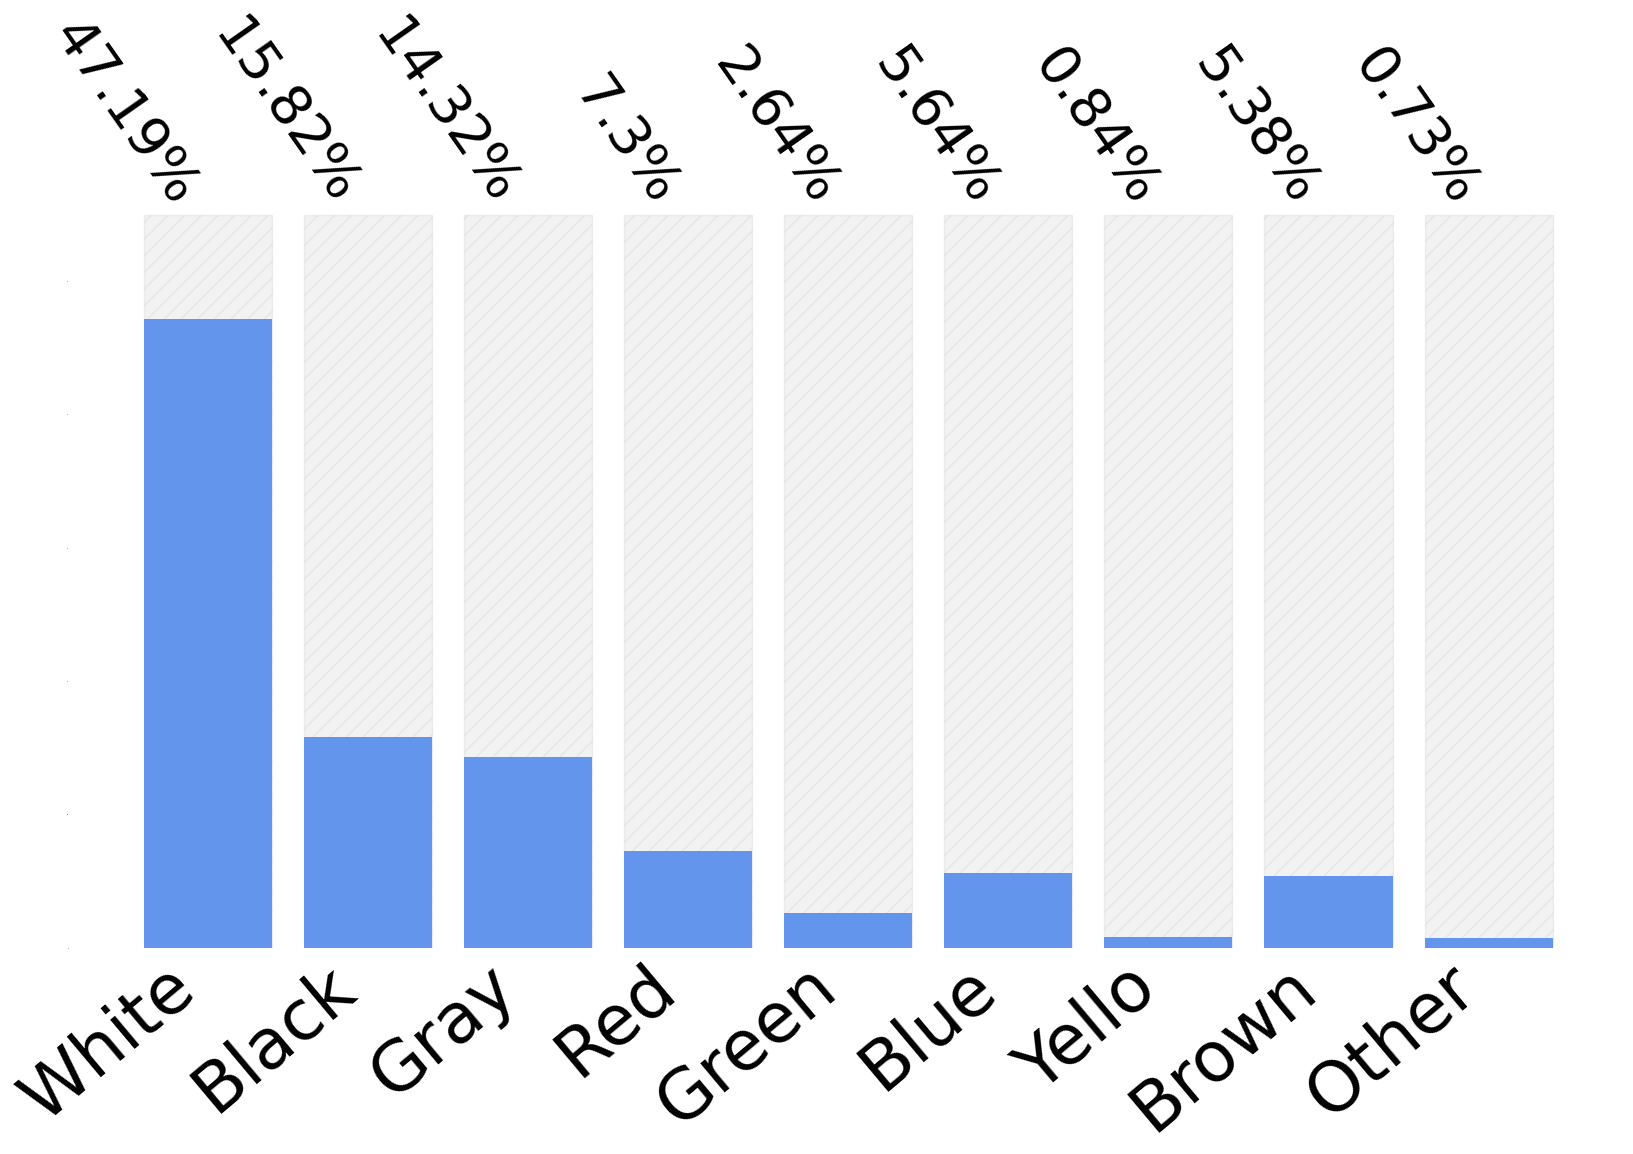

In [2]:
### data setting
xticklabels = np.array(['White', 'Black', 'Gray', 'Red', 'Green',
                        'Blue', 'Yello', 'Brown', 'Other'])
data = np.array([47.19, 15.82, 14.32, 7.30, 2.64,
                5.64, 0.84, 5.38, 0.73])
background = 55*np.ones_like(data)
xticks = np.arange(len(data))

fig, ax = plt.subplots(figsize = (20,10))
ax.bar(xticks, background,
        color = 'k',
        alpha = 0.05,
        hatch = '//',
        edgecolor = 'k')
rects = ax.bar(xticks, data,
                color = 'cornflowerblue')

for rect in rects:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()

    ax.text(x + width/2, 55,
            str(height) + '%',
            fontsize=40,
            rotation=-55,
            ha='right',
            va='bottom')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,
                    fontsize=50,
                    rotation=40,
                    ha='right')
ax.tick_params(axis = 'y',
                labelsize = 0,
                size = 0)
ax.tick_params(axis = 'x',
                size = 0)
for spine_idx, spine_loc in enumerate(ax.spines):
    ax.spines[spine_loc].set_visible(False)

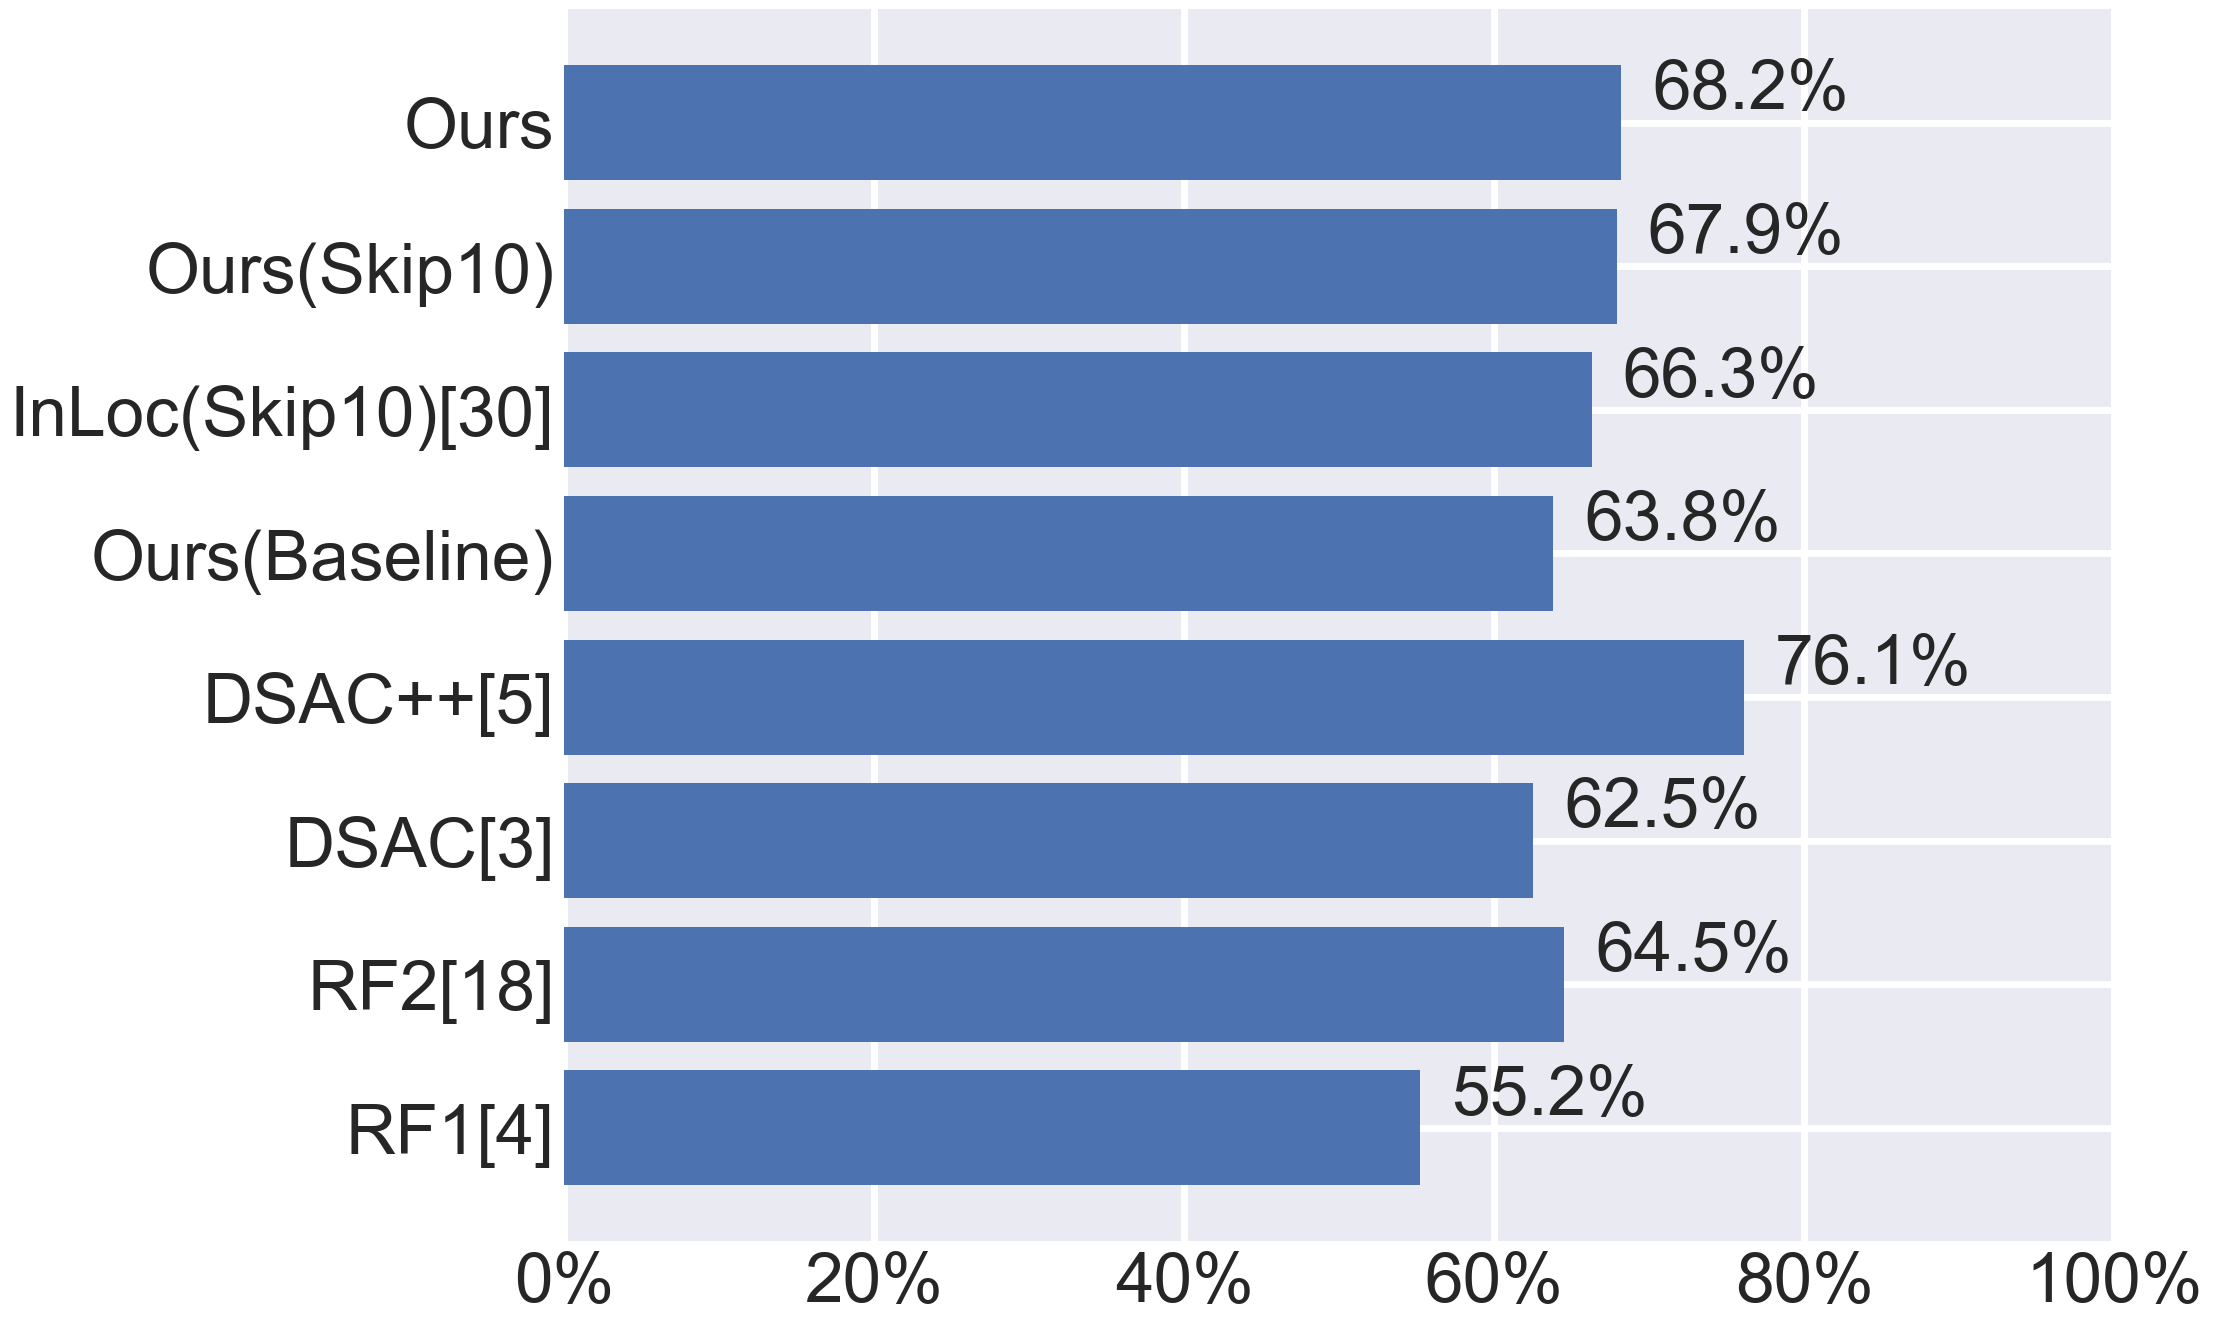

In [3]:
plt.style.use('seaborn')
labels = np.array(['Ours', 'Ours(Skip10)', 'InLoc(Skip10)[30]',
                    'Ours(Baseline)', 'DSAC++[5]', 'DSAC[3]',
                    'RF2[18]', 'RF1[4]'])
data = np.array([68.2, 67.9, 66.3, 63.8, 76.1,
                62.5, 64.5, 55.2])
yticks = np.arange(len(labels))
label_fontdict = {'fontfamily':'sans-serif',
                'size':50}
annot_fontdict = {'size':50,
                'ha':'left',
                'va':'bottom'}
fig, ax = plt.subplots(figsize = (20,16))
rects = ax.barh(yticks, data)
ax.invert_yaxis()

ax.set_yticks(yticks)
ax.set_yticklabels(labels,
                    fontdict=label_fontdict)
xticks = np.arange(0, 101, 20)
xticklabels = [str(i) + '%' for i in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,
                    fontdict=label_fontdict)
ax.grid(linewidth=5)

xtick_interval = xticks[1] - xticks[0]
for rect_idx, rect in enumerate(rects):
    y = rect.get_y()
    height = rect.get_height()
    width = rect.get_width()
    ax.text(width + xtick_interval*0.1,
            y + height/2,
            str(width)+'%',
            fontdict=annot_fontdict)

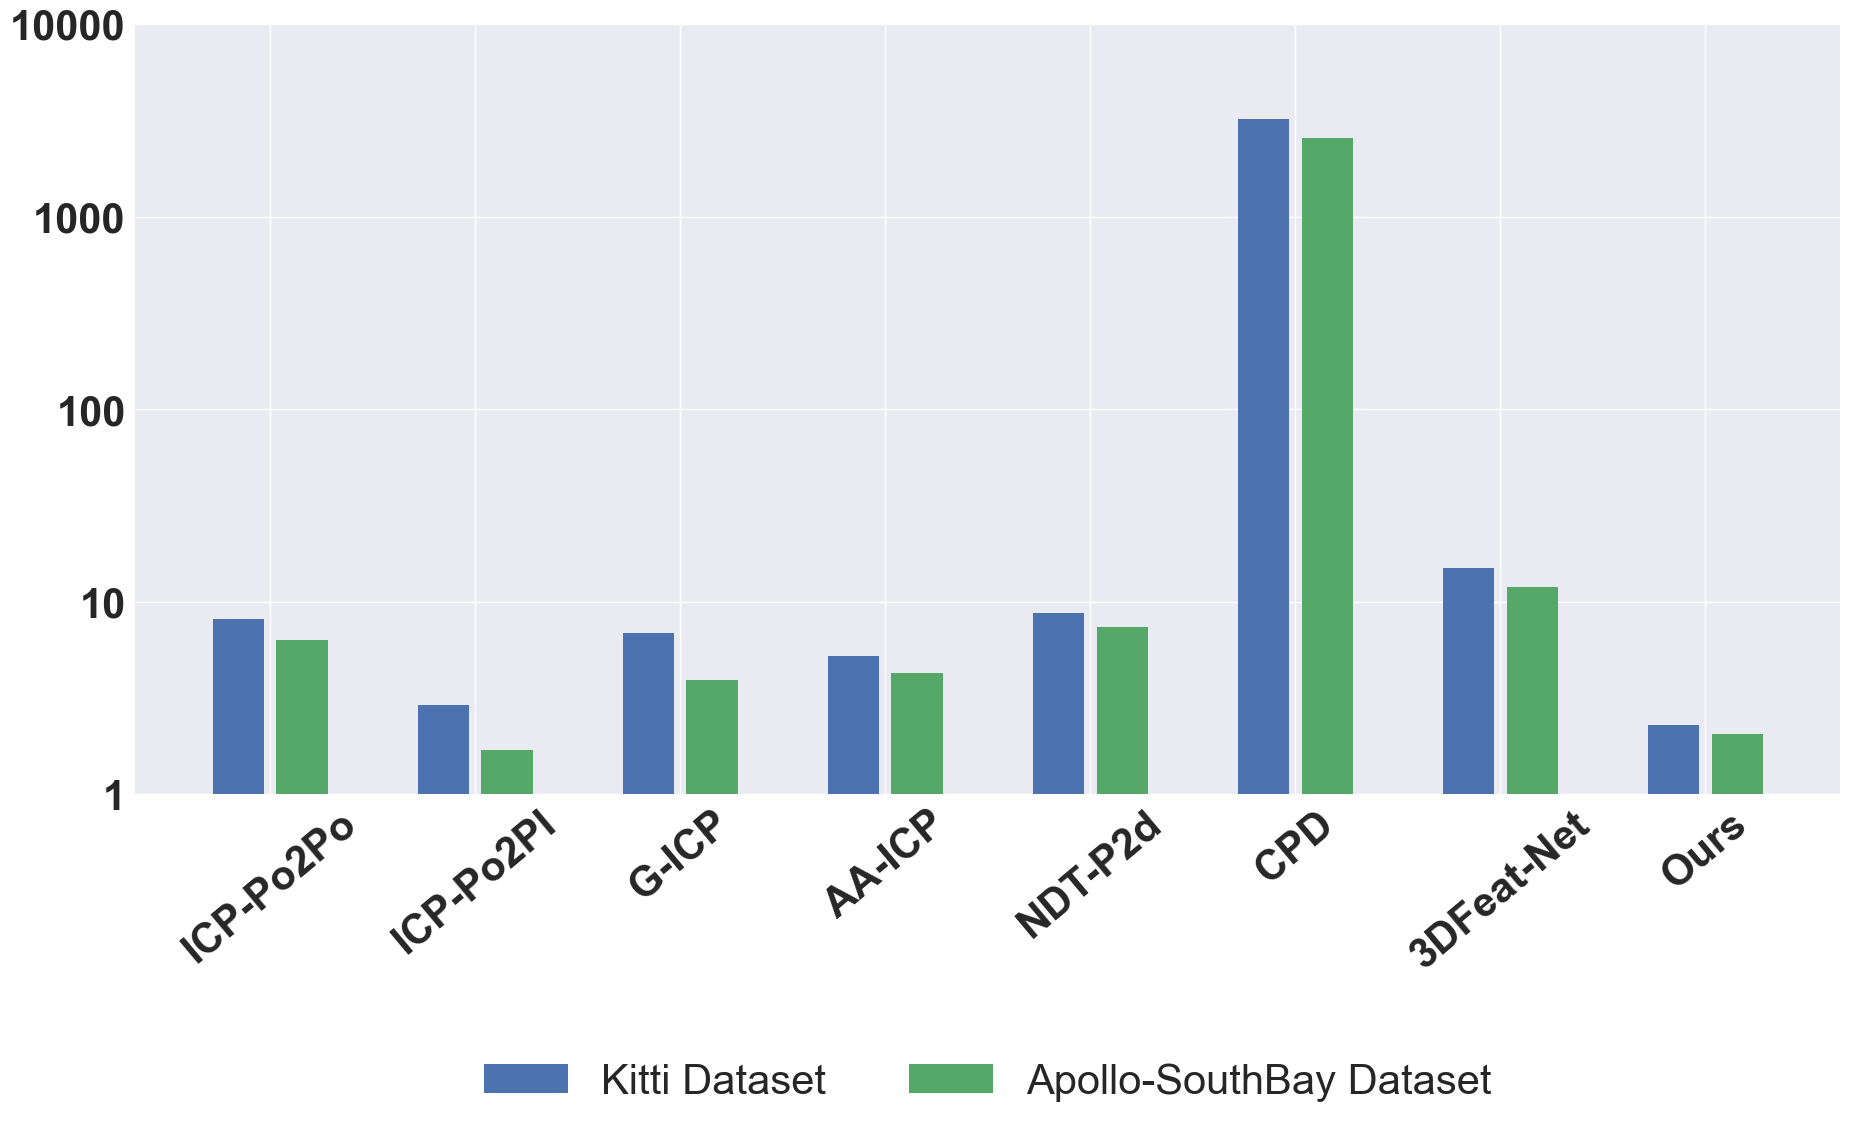

In [4]:


### data setting
ex_name = ['Kitti Dataset', 'Apollo-SouthBay Dataset']
labels = ['ICP-Po2Po', 'ICP-Po2PI', 'G-ICP',
        'AA-ICP', 'NDT-P2d', 'CPD',
        '3DFeat-Net', 'Ours']
xticks = np.arange(len(labels))

kitti_data = [8.17, 2.92, 6.92, 5.24, 8.73,
            3241.29, 15.02, 2.3]
apollo_data = [6.33, 1.69, 3.94, 4.25, 7.44,
            2566.02, 11.92, 2.07]

fig, ax = plt.subplots(figsize = (22,10))
ax.set_yscale('log')

WIDTH = 0.25
rect1 = ax.bar(xticks - WIDTH/2 - 0.03,
                kitti_data,
                width=WIDTH,
                label=ex_name[0])
rect2 = ax.bar(xticks + WIDTH/2 + 0.03,
                apollo_data,
                width=WIDTH,
                label=ex_name[1])

ax.legend(loc = 'upper center',
            bbox_to_anchor = (0.5, -0.3),
            fontsize = 30,
            ncol = len(ex_name))

yticks = [10**i for i in range(5)]
x_tick_fontdict = {'size':30,
                    'weight':'semibold',
                    'rotation':40}
y_tick_fontdict = x_tick_fontdict.copy()

del y_tick_fontdict['rotation']
ax.set_yticks(yticks)
ax.set_yticklabels(yticks,
fontdict=y_tick_fontdict)
ax.set_yticks([], minor = True)
ax.set_xticks(xticks)
ax.set_xticklabels(labels,
fontdict=x_tick_fontdict)
ax.tick_params(axis = 'both',
size = 0)

In [5]:
ax.grid(axis = 'y',
        linewidth = 4,
        alpha = 0.4)
ax.set_axisbelow(True)
for spine_idx, spine_loc in enumerate(ax.spines):
    ax.spines[spine_loc].set_visible(False)
yticks = ax.get_yticks()
ytick_interval = yticks[1] - yticks[0]
annot_fontdict = {'size':30,
                'rotation':90,
                'va':'bottom',
                'ha':'center'}

for rect in rect1:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    ax.text(x + width/2,
            height + ytick_interval*0.2,
            str(height),
            fontdict=annot_fontdict)
for rect in rect2:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    
    ax.text(x + width/2,
            height + ytick_interval*0.2,
            str(height),
            fontdict=annot_fontdict)

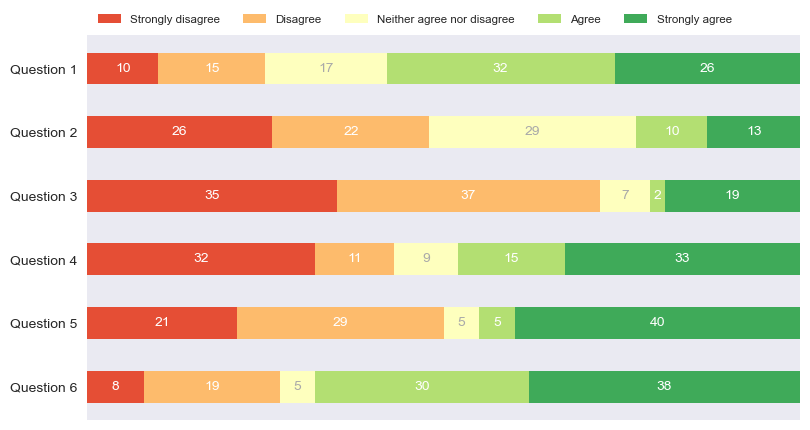

In [6]:
category_names = ['Strongly disagree', 'Disagree',
                'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

labels = list(results.keys())
data = np.array(list(results.values()))
data_idx = np.arange(data.shape[0])
data_cum = data.cumsum(axis=1)
cmap = cm.get_cmap('RdYlGn')
category_colors = cmap(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim([0, 100])

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
    label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center',
                color=text_color)
ax.legend(loc='lower left',
            bbox_to_anchor=(0, 1),
            fontsize='small',
            ncol=len(category_names))